In [77]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
from IPython.display import Image

from os import path

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls data

from_api.pkl	       tweet_json.txt
image-predictions.tsv  twitter-archive-enhanced.csv


# Gather

## Get Twitter archive file

In [3]:
twitter_archive = pd.read_csv('data/twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Get image prediction file

In [4]:
image_prediction_file = 'data/image-predictions.tsv'

if not path.exists(image_prediction_file):
    print('No image-predictions.tsv, downloading')
    # downloaded image predictions table with requests API 
    url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
    response = requests.get(url)

    with open(image_prediction_file, mode ='wb') as file:
        file.write(response.content)

#load image prediction
image_prediction = pd.read_csv(image_prediction_file, sep='\t' )

image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [5]:
CONSUMER_KEY = "J0AmXoRPvmGx9xDp4FvhicMB2"
CONSUMER_SECRET = "IIwibMYkUrY4zBBcZUSOhRHBNAfVeZ9svvQPh9KvIAnix9sBsg"
OAUTH_TOKEN = "566981098-Q4FhH14h2AhqofUCCzNsowShGIYsHtp9aCeADHxK"
OAUTH_TOKEN_SECRET = "l7SDmnhtmISoKdGaBNcN2FmQ7Dqt7an3zjDs7oVDJIy6h"

In [6]:
import tweepy

def retreive_API_data(ids, file_path, force_retreive = False):
    if path.exists(file_path):
        print(f'File {file_path} found')
        if force_retreive:
            print('Force retreive again')
        else:
            print('No need to retreive again')
            return 
    print('Start retreiving data from twitter API')
    # Authenticate to Twitter
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    
    failure_count = 0
    # List of tweets
    api_records = []

    # start time of execution
    start = time.time()

    # For loop which will add each available tweet json to df_list
    for tweet_id in ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 

            favorites = tweet['favorite_count'] # number of favorites for the tweet
            retweets = tweet['retweet_count'] # number of retweets
            date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
            
            api_records.append({'tweet_id': int(tweet_id),
                            'favorites': int(favorites),
                            'retweets': int(retweets),
                            'date_time': pd.to_datetime(date_time)})
        except Exception as e:
            print('Fail at ',str(tweet_id)+ " _ " + str(e))
            failure_count += 1

    # end time for excution
    end = time.time()
    
    df = pd.DataFrame(api_records)

    #printing time for execution
    print("Total time taken for execution", end - start)
    print(f'Retreived {len(df)} records with {failure_count} failures')
    
    df.to_pickle(file_path)
    
    display(df.head())
    return 
    


In [7]:
api_data_path = 'data/from_api.pkl'
retreive_API_data(twitter_archive['tweet_id'], api_data_path)

File data/from_api.pkl found
No need to retreive again


In [8]:
df_api_data = pd.read_pickle(api_data_path)
df_api_data.head()

,tweet_id,favorites,retweets,date_time
0,892420643555336193,34995,7343,2017-08-01 16:23:56+00:00
1,892177421306343426,30300,5479,2017-08-01 00:17:27+00:00
2,891815181378084864,22791,3623,2017-07-31 00:18:03+00:00
3,891689557279858688,38258,7532,2017-07-30 15:58:51+00:00
4,891327558926688256,36539,8113,2017-07-29 16:00:24+00:00


In [9]:
df_api_data.to_csv('data/tweet_json.txt')

# Access Data

## twitter-archive-enhanced

In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1402,699423671849451520,NaN,NaN,2016-02-16 02:42:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Don't ever talk to me or my son again."" ...bo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/699423671...,10,10,None,None,None,None,None
2094,670778058496974848,NaN,NaN,2015-11-29 01:35:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""To bone or not to bone?""\n10/10 https://t.co/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670778058...,10,10,None,None,None,None,None
1336,705223444686888960,NaN,NaN,2016-03-03 02:49:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bode. He's a heavy sleeper. 9/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705223444...,9,10,Bode,None,None,None,None
1867,675334060156301312,NaN,NaN,2015-12-11 15:19:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Good morning here's a grass pupper. 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675334060...,12,10,None,None,None,pupper,None
209,852226086759018497,NaN,NaN,2017-04-12 18:25:07 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet General. He wasn't content with the quali...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852226086...,14,10,General,None,None,None,None
1538,689835978131935233,NaN,NaN,2016-01-20 15:44:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fynn &amp; Taco. Fynn is an all-powerful ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689835978...,11,10,Fynn,None,None,None,None
2301,667044094246576128,NaN,NaN,2015-11-18 18:17:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 gimme now https://t.co/QZAnwgnOMB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667044094...,12,10,None,None,None,None,None
577,800855607700029440,NaN,NaN,2016-11-22 00:17:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Lin_Manuel: 11/10 would recommend. https:/...,8.008540e+17,79923701.0,2016-11-22 00:10:52 +0000,https://twitter.com/littlewiewel/status/800852...,11,10,None,None,None,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None
1276,709158332880297985,NaN,NaN,2016-03-13 23:24:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rodney. He's a Ukranian Boomchicka. Outsi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709158332...,10,10,Rodney,None,None,None,None


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

<AxesSubplot:ylabel='Frequency'>

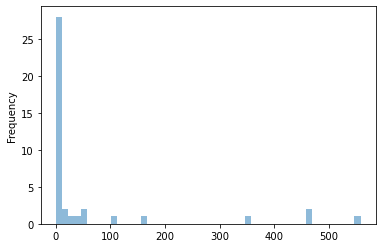

In [13]:
numerator_count = twitter_archive.rating_numerator.value_counts()
display(numerator_count)
numerator_count.plot.hist(bins=50, alpha=0.5)

In [14]:
# take a look at the extreme values
twitter_archive.iloc[numerator_count[numerator_count ==1].index]['text']

182     RT @dog_rates: This is Luna. It's her first ti...
204     RT @dog_rates: I usually only share these on F...
143     This is Paisley. She ate a flower just to prov...
121     This is Scout. He just graduated. Officially a...
99      Here's a very large dog. He has a date later. ...
20      This is Gerald. He was just told he didn't get...
45      This is Bella. She hopes her smile made you sm...
27      This is Mingus. He's a wonderful father to his...
17      This is Zeke. He has a new stick. Very proud o...
24      You may not have known you needed to see this ...
26      This is Maya. She's very shy. Rarely leaves he...
44      This is Noah. He can't believe someone made th...
50      This is Stanley. He has his first swim lesson ...
60      This is Bella. She had her first beach experie...
80      Meet Dante. At first he wasn't a fan of his ne...
84      This is Benedict. He wants to thank you for th...
88      You'll get your package when that precious man...
1776    This i

In [15]:
twitter_archive.iloc[numerator_count[numerator_count >400].index]['text']

12    Here's a puppo that seems to be on the fence a...
11    This is Bruno. He is a service shark. Only get...
10    This is Koda. He is a South Australian decksha...
Name: text, dtype: object

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

<AxesSubplot:ylabel='Frequency'>

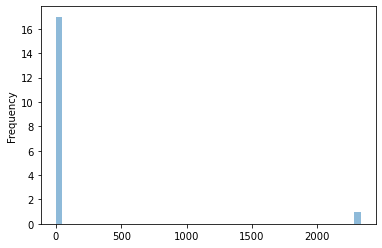

In [16]:
denominator_count = twitter_archive.rating_denominator.value_counts()
display(denominator_count)
denominator_count.plot.hist(bins=50, alpha=0.5)

In [17]:
twitter_archive.iloc[denominator_count[denominator_count >2000].index]['text']

10    This is Koda. He is a South Australian decksha...
Name: text, dtype: object

### Twitter archive quality issues:
1. Missing data in expanded_urls
2. Wrong type to timestamp
3. 'None' in name column
4. All-none records in "doggo 	floofer 	pupper 	puppo"
5. rating should be normalized, and one 0 denominator record

In [18]:
sum(twitter_archive['tweet_id'].duplicated())

0

### Twitter archive tidy issues:
1. "doggo 	floofer 	pupper 	puppo" should be in a single column

In [19]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
900,699801817392291840,https://pbs.twimg.com/media/CbYyCMcWIAAHHjF.jpg,2,golden_retriever,0.808978,True,Irish_setter,0.042428,True,Labrador_retriever,0.023536,True
370,672975131468300288,https://pbs.twimg.com/media/CVbjRSIWsAElw2s.jpg,1,pug,0.836421,True,Brabancon_griffon,0.044668,True,French_bulldog,0.036570,True
1403,769212283578875904,https://pbs.twimg.com/media/CqzKfQgXEAAWIY-.jpg,1,golden_retriever,0.166538,True,Pekinese,0.148215,True,cocker_spaniel,0.082735,True
250,670691627984359425,https://pbs.twimg.com/media/CU7GehOUYAA9nn-.jpg,1,Shetland_sheepdog,0.071124,True,home_theater,0.068398,False,American_Staffordshire_terrier,0.066964,True
74,667393430834667520,https://pbs.twimg.com/media/CUMOyd3XIAAl13H.jpg,1,papillon,0.557009,True,Border_collie,0.271963,True,collie,0.073473,True
946,704499785726889984,https://pbs.twimg.com/media/Ccbi0UGWoAA4fwg.jpg,1,Chihuahua,0.376541,True,Siamese_cat,0.098057,False,Labrador_retriever,0.085211,True
1666,812709060537683968,https://pbs.twimg.com/media/C0dSk98WEAALyya.jpg,1,Irish_setter,0.326873,True,golden_retriever,0.182610,True,Leonberg,0.156912,True
268,670811965569282048,https://pbs.twimg.com/media/CU8z65IUEAQBc4q.jpg,1,basset,0.994090,True,Walker_hound,0.003973,True,beagle,0.001406,True
1084,718540630683709445,https://pbs.twimg.com/media/CfjE5FRXEAErFWR.jpg,2,Maltese_dog,0.632289,True,West_Highland_white_terrier,0.187055,True,cairn,0.044413,True
411,673906403526995968,https://pbs.twimg.com/media/CVoySqoWUAAWb7N.jpg,1,toilet_seat,0.683319,False,soft-coated_wheaten_terrier,0.048928,True,Siberian_husky,0.030386,True


In [22]:
image_prediction[image_prediction.p1_conf < 0.06].jpg_url

38      https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg
136     https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg
1093    https://pbs.twimg.com/media/CfznaXuUsAAH-py.jpg
Name: jpg_url, dtype: object

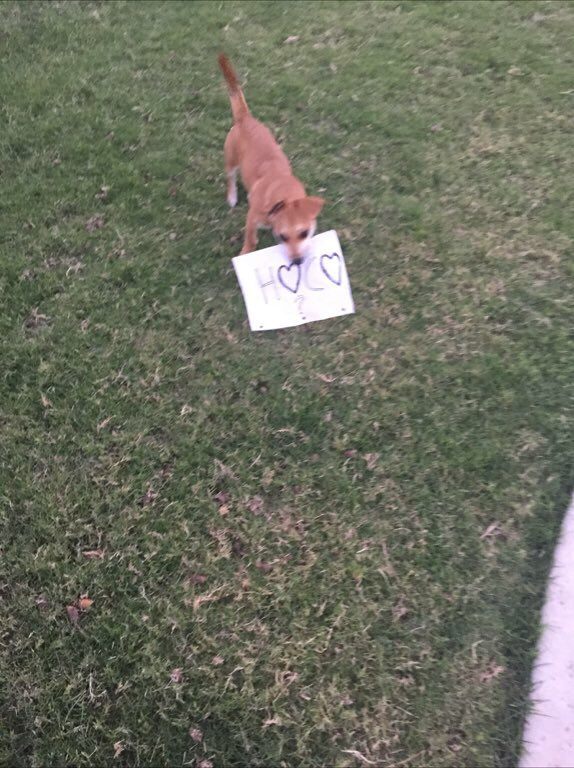

In [23]:
Image('https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg')

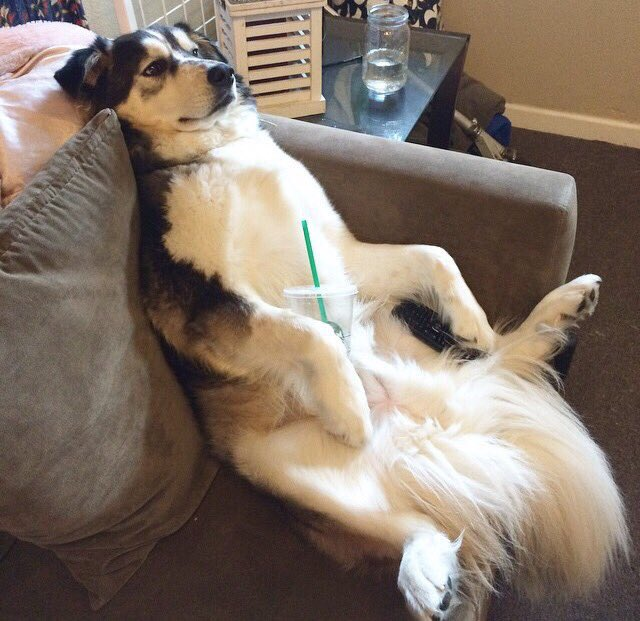

In [24]:
Image('https://pbs.twimg.com/media/CUcECBYWcAAzFRg.jpg')

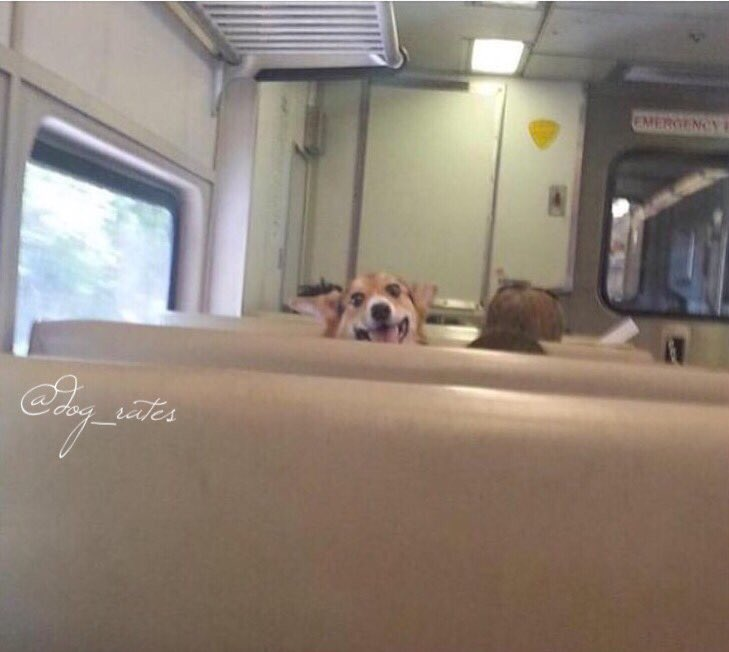

In [25]:
Image('https://pbs.twimg.com/media/CfznaXuUsAAH-py.jpg')

### Image prediction quality issues:
1. The format of breed name varies
For example: 'Bernese_mountain_dog' should remove do and all breed names should start with a capital letter. 
2. Some outliers
The some p1_conf is too low, say minimum is 0.044333
3. p1, p2, p3 should be categorical


### Image prediction tidy issues:
1. p1, p1_conf, p1_dog have duplicated information and can not be used for the following analysis directly

In [26]:
df_api_data.describe()

,tweet_id,favorites,retweets
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7306.874303,2585.728443
std,6.823170e+16,11349.637966,4373.964347
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1266.000000,524.500000
50%,7.182469e+17,3169.000000,1205.000000
75%,7.986692e+17,8937.000000,2993.000000
max,8.924206e+17,150403.000000,74207.000000


In [27]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2331 non-null   int64              
 1   favorites  2331 non-null   int64              
 2   retweets   2331 non-null   int64              
 3   date_time  2331 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 73.0 KB


In [28]:
df_api_data.sample(20)

,tweet_id,favorites,retweets,date_time
1620,683852578183077888,1870,330,2016-01-04 03:28:54+00:00
1632,683357973142474752,2783,874,2016-01-02 18:43:31+00:00
1717,679462823135686656,30078,17766,2015-12-23 00:45:35+00:00
764,775350846108426240,9914,3794,2016-09-12 15:10:21+00:00
190,854365224396361728,17830,4350,2017-04-18 16:05:17+00:00
1065,737800304142471168,9608,3308,2016-06-01 00:17:54+00:00
748,777641927919427584,0,4101,2016-09-18 22:54:18+00:00
871,759197388317847553,5909,1881,2016-07-30 01:22:17+00:00
159,859924526012018688,18274,3726,2017-05-04 00:15:58+00:00
697,783839966405230592,29438,10518,2016-10-06 01:23:05+00:00


# Cleaning

## Define:
1. Merge three tables into one
   Why not keeping two or three tables? All these three tables share the same unique key tweet_id
2. Remove non-informative columns: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'
3. melt doggo, floofer, pupper, puppo columns into a single categorical 'dog type'column
4. timestamp is a duplicate of date_time and in a wrong format, drop timestamp
5. Convert favorites, retweets, and img_num should be into int64 type
6. fix the 0 denominator issue and normalize the rating
7. Merge the information of p1,p1_conf,p1_dog to a single categorical column, same to p2, and p3
8. remove url columns: source, expanded_urls and jpg_url
9. Replace None with '' in the name column



## Code

In [29]:
### 1 Merge
twitter_archive.set_index('tweet_id', inplace=True)
display(twitter_archive.sample(20))

image_prediction.set_index('tweet_id', inplace=True)
display(image_prediction.sample(20))

df_api_data.set_index('tweet_id', inplace=True)
display(df_api_data.sample(20))

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
849412302885593088,NaN,NaN,2017-04-05 00:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Noosh. He noticed you were in the show...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849412302...,12,10,Noosh,None,None,None,None
676811746707918848,NaN,NaN,2015-12-15 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Penny &amp; Gizmo. They are pract...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676811746...,9,10,Penny,None,None,None,None
681610798867845120,NaN,NaN,2015-12-28 23:00:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*collapses* 12/10 https://t.co/C7M8mnzHIK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681610798...,12,10,None,None,None,None,None
678767140346941444,NaN,NaN,2015-12-21 02:41:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She makes awful decisions. 8/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678767140...,8,10,Mia,None,None,None,None
670444955656130560,NaN,NaN,2015-11-28 03:31:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Paull. He just stubbed his toe. 10/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670444955...,10,10,Paull,None,None,None,None
813142292504645637,NaN,NaN,2016-12-25 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and look at t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813142292...,13,10,None,None,None,None,None
759197388317847553,NaN,NaN,2016-07-30 01:22:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. She's just heckin precious af I ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759197388...,12,10,Luna,None,None,None,None
680889648562991104,NaN,NaN,2015-12-26 23:15:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheesy. It's her birthday. She's patie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680889648...,9,10,Cheesy,None,None,None,None
695051054296211456,NaN,NaN,2016-02-04 01:07:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Brian (pronounced ""Kirk""). He's not amuse...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/695051054...,6,10,Brian,None,None,None,None


,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
690248561355657216,https://pbs.twimg.com/media/CZRBZ9mWkAAWblt.jpg,1,motor_scooter,0.382690,False,moped,0.318017,False,pickup,0.040625,False
667119796878725120,https://pbs.twimg.com/media/CUIV6F7XIAA1tAM.jpg,1,Pembroke,0.741563,True,Chihuahua,0.057866,True,toy_poodle,0.039125,True
693231807727280129,https://pbs.twimg.com/media/CZ7aplIUsAAq-8s.jpg,1,vizsla,0.876413,True,Chesapeake_Bay_retriever,0.078400,True,Rhodesian_ridgeback,0.032194,True
793256262322548741,https://pbs.twimg.com/media/CwI2XCvXEAEO8mc.jpg,1,basset,0.207622,True,Walker_hound,0.060574,True,beagle,0.041221,True
717841801130979328,https://pbs.twimg.com/media/CfZJTphWAAAl5Ys.jpg,1,Brittany_spaniel,0.922876,True,English_springer,0.070113,True,bath_towel,0.002561,False
678396796259975168,https://pbs.twimg.com/media/CWomSU_XIAAUYiK.jpg,2,Pembroke,0.956180,True,Cardigan,0.031803,True,Chihuahua,0.006276,True
684880619965411328,https://pbs.twimg.com/media/CYEvSaRWwAAukZ_.jpg,1,clog,0.081101,False,spindle,0.066957,False,agama,0.060884,False
805958939288408065,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,1,Irish_setter,0.574557,True,golden_retriever,0.339251,True,seat_belt,0.046108,False
709556954897764353,https://pbs.twimg.com/media/CdjaSFCWAAAJZh3.jpg,2,golden_retriever,0.790026,True,kuvasz,0.105031,True,Labrador_retriever,0.087051,True


,favorites,retweets,date_time
tweet_id,,,
766078092750233600,0,2537,2016-08-18 01:03:45+00:00
824297048279236611,14719,3731,2017-01-25 16:45:05+00:00
677228873407442944,3359,1539,2015-12-16 20:48:40+00:00
749417653287129088,5910,1575,2016-07-03 01:41:06+00:00
848213670039564288,7820,675,2017-04-01 16:41:12+00:00
717537687239008257,5547,1754,2016-04-06 02:21:30+00:00
820837357901512704,0,6516,2017-01-16 03:37:31+00:00
773985732834758656,10489,3739,2016-09-08 20:45:53+00:00
674632714662858753,1398,531,2015-12-09 16:52:27+00:00


In [30]:
df_combined = pd.concat([twitter_archive, image_prediction, df_api_data], join='outer', axis=1)
df_combined.sample(20)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,date_time
tweet_id,,,,,,,,,,,,,,,,,,,,,
699079609774645248,NaN,NaN,2016-02-15 03:55:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reagan. He's a Persnicketus Derpson. Grea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699079609...,8,...,True,Chesapeake_Bay_retriever,0.119550,True,kelpie,0.097600,True,2355.0,618.0,2016-02-15 03:55:41+00:00
668994913074286592,NaN,NaN,2015-11-24 03:29:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous pups here. Both have cute fake ho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668994913...,5,...,False,English_springer,0.089763,True,French_bulldog,0.082186,True,406.0,204.0,2015-11-24 03:29:51+00:00
851591660324737024,NaN,NaN,2017-04-11 00:24:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh jeez u did me quite the spook little fella....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851591660...,11,...,True,Chihuahua,0.077254,True,French_bulldog,0.076559,True,15490.0,3254.0,2017-04-11 00:24:08+00:00
707411934438625280,NaN,NaN,2016-03-09 03:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""I shall trip the big pupper with leash. Big p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/707411934...,11,...,True,Airedale,0.028515,True,giant_schnauzer,0.024876,True,2208.0,569.0,2016-03-09 03:45:22+00:00
692417313023332352,NaN,NaN,2016-01-27 18:42:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Herschel. He's slightly bigger than ur av...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692417313...,7,...,False,mink,0.169945,False,polecat,0.144494,False,8999.0,3295.0,2016-01-27 18:42:06+00:00
703407252292673536,NaN,NaN,2016-02-27 02:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper doesn't understand gates. 10/10 so...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703407252...,10,...,False,turnstile,0.088583,False,carton,0.082924,False,2344.0,663.0,2016-02-27 02:32:12+00:00
687807801670897665,NaN,NaN,2016-01-15 01:25:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trooper &amp; Maya. Trooper protects Maya...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687807801...,11,...,True,boxer,0.135697,True,American_Staffordshire_terrier,0.086591,True,2290.0,684.0,2016-01-15 01:25:33+00:00
879862464715927552,NaN,NaN,2017-06-28 00:42:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Romeo. He would like to do an entrance...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879862464...,13,...,True,beagle,0.146654,True,cocker_spaniel,0.009485,True,20367.0,3045.0,2017-06-28 00:42:13+00:00
697242256848379904,NaN,NaN,2016-02-10 02:14:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He has a massive tumor growing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697242256...,10,...,False,Siamese_cat,0.165791,False,Eskimo_dog,0.063533,True,2436.0,640.0,2016-02-10 02:14:42+00:00


In [31]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 666020888022790149 to 892420643555336193
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   in_reply_to_status_id       78 non-null     float64            
 1   in_reply_to_user_id         78 non-null     float64            
 2   timestamp                   2356 non-null   object             
 3   source                      2356 non-null   object             
 4   text                        2356 non-null   object             
 5   retweeted_status_id         181 non-null    float64            
 6   retweeted_status_user_id    181 non-null    float64            
 7   retweeted_status_timestamp  181 non-null    object             
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2

In [32]:
df_cleaned = df_combined.copy()

In [33]:
## 2 remove non-informative columns


In [34]:
df_cleaned.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id',
                          'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'],
                inplace = True)

In [35]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 666020888022790149 to 892420643555336193
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2356 non-null   object             
 1   source              2356 non-null   object             
 2   text                2356 non-null   object             
 3   expanded_urls       2297 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
 11  jpg_url             2075 non-null   object             
 12  img

In [36]:
## 3 melt doggo, floofer, pupper, puppo columns into a single 'dog type'column

In [37]:
#what are the options
set(df_cleaned.doggo)|set(df_cleaned.floofer)|set(df_cleaned.pupper)|set(df_cleaned.puppo)

{'None', 'doggo', 'floofer', 'pupper', 'puppo'}

In [38]:
### 3.A extract from text
df_cleaned['dog_type_text'] = df_cleaned['text'].str.extract('(doggo|floofer|pupper|puppo)')
df_cleaned[['dog_type_text', 'doggo', 'floofer', 'pupper', 'puppo']].sample(50)

,dog_type_text,doggo,floofer,pupper,puppo
tweet_id,,,,,
667211855547486208,NaN,None,None,None,None
841077006473256960,NaN,None,None,None,None
781955203444699136,NaN,None,None,None,None
727524757080539137,pupper,None,None,pupper,None
678399652199309312,NaN,None,None,None,None
813187593374461952,NaN,None,None,None,None
841320156043304961,NaN,None,None,None,None
817120970343411712,NaN,None,None,None,None
859607811541651456,puppo,None,None,None,puppo


In [39]:
df_cleaned[['dog_type_text', 'doggo', 'floofer', 'pupper', 'puppo']].sample(50)

,dog_type_text,doggo,floofer,pupper,puppo
tweet_id,,,,,
887517139158093824,NaN,None,None,None,None
704364645503647744,NaN,None,None,None,None
671744970634719232,NaN,None,None,None,None
796484825502875648,doggo,doggo,None,None,None
718246886998687744,NaN,None,None,None,None
676263575653122048,pupper,None,None,pupper,None
754449512966619136,NaN,None,None,None,None
753375668877008896,NaN,None,None,None,None
673662677122719744,NaN,None,None,None,None


In [40]:
## in the case of conflicts, go with the existing one
dog_type_list =[]
for row in df_cleaned[['dog_type_text','doggo','floofer','pupper','puppo']].iterrows():
    if row[1][0] in set(row[1][1:]):
        dog_type = row[1][0]
    else:
        dog_type = set(row[1][1:]).discard('None')
    print(dog_type)
    dog_type_list.append(dog_type)
df_cleaned['dog_type'] = dog_type_list

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


None
None
None
puppo
None
None
None
None
None
None
None
None
None
None
None
None
pupper
None
pupper
None
None
None
pupper
None
None
None
None
None
None
None
None
None
None
None
pupper
None
None
None
None
None
None
None
None
None
None
None
None
None
doggo
None
doggo
None
None
None
None
None
doggo
None
None
None
doggo
None
None
None
None
None
pupper
None
None
None
None
pupper
None
None
None
None
None
None
None
None
puppo
None
None
None
pupper
None
None
pupper
None
doggo
None
None
None
None
None
None
pupper
None
None
None
None
None
None
None
None
pupper
None
None
None
doggo
puppo
puppo
None
None
None
None
None
None
None
None
doggo
None
None
doggo
doggo
None
doggo
None
None
None
None
pupper
None
None
None
None
puppo
None
None
None
None
None
None
None
None
None
None
pupper
None
None
None
puppo
puppo
None
puppo
None
None
None
doggo
None
doggo
None
None
None
doggo
doggo
None
None
None
None
None
pupper
None
None
None
None
None
doggo
None
None
None
None
None
None
None
None
doggo
doggo
None
None

In [41]:
df_cleaned[['dog_type','dog_type_text','doggo','floofer','pupper','puppo']].sample(50)

,dog_type,dog_type_text,doggo,floofer,pupper,puppo
tweet_id,,,,,,
821153421864615936,None,NaN,None,None,None,None
767754930266464257,None,NaN,None,None,None,None
802247111496568832,None,NaN,None,None,None,None
674269164442398721,None,NaN,None,None,None,None
817827839487737858,None,NaN,None,None,None,None
681261549936340994,None,NaN,None,None,None,None
892177421306343426,None,NaN,None,None,None,None
715680795826982913,None,NaN,None,None,None,None
680889648562991104,None,NaN,None,None,None,None


In [42]:
df_cleaned.drop(columns=['dog_type_text','doggo','floofer','pupper','puppo'], inplace=True)
df_cleaned['dog_type'] = pd.Categorical(df_cleaned['dog_type'], ordered=False, categories=['doggo','floofer','pupper','puppo'])
df_cleaned.sample(20)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,date_time,dog_type
tweet_id,,,,,,,,,,,,,,,,,,,,,
675362609739206656,2015-12-11 17:12:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She loves that shoe. Still no s...,https://twitter.com/dog_rates/status/675362609...,12,10,Daisy,https://pbs.twimg.com/media/CV9etctWUAAl5Hp.jpg,1.0,Labrador_retriever,...,ice_bear,0.218289,False,kuvasz,0.139911,True,992.0,210.0,2015-12-11 17:12:48+00:00,NaN
811985624773361665,2016-12-22 17:23:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Ted. He accidentally opened the f...,https://twitter.com/dog_rates/status/811985624...,11,10,Ted,https://pbs.twimg.com/media/C0TAnZIUAAAADKs.jpg,1.0,Staffordshire_bullterrier,...,French_bulldog,0.159935,True,doormat,0.058672,False,7148.0,1370.0,2016-12-22 17:23:53+00:00,NaN
860177593139703809,2017-05-04 17:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,https://twitter.com/dog_rates/status/761672994...,10,10,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28044.0,2017-05-04 17:01:34+00:00,NaN
687704180304273409,2016-01-14 18:33:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Blakely. He thinks that's a hat. ...,https://twitter.com/dog_rates/status/687704180...,9,10,Blakely,https://pbs.twimg.com/media/CYs3TKzUAAAF9A2.jpg,1.0,miniature_pinscher,...,toy_terrier,0.012231,True,Chihuahua,0.005397,True,2345.0,803.0,2016-01-14 18:33:48+00:00,pupper
834209720923721728,2017-02-22 01:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wilson. He's aware that he has somethi...,https://twitter.com/dog_rates/status/834209720...,12,10,Wilson,https://pbs.twimg.com/media/C5O1UAaWIAAMBMd.jpg,1.0,golden_retriever,...,Pekinese,0.197861,True,Labrador_retriever,0.008654,True,19982.0,4551.0,2017-02-22 01:14:30+00:00,NaN
745422732645535745,2016-06-22 01:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,https://twitter.com/dog_rates/status/745422732...,9,10,very,https://pbs.twimg.com/media/ClhGBCAWIAAFCsz.jpg,1.0,Labrador_retriever,...,golden_retriever,0.308261,True,ice_bear,0.004269,False,8258.0,2315.0,2016-06-22 01:06:43+00:00,NaN
711363825979756544,2016-03-20 01:28:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Please, no puparazzi"" 11/10 https://t.co/nJIX...",https://twitter.com/dog_rates/status/711363825...,11,10,None,https://pbs.twimg.com/media/Cd9Fn5QUMAAYMT4.jpg,1.0,Pembroke,...,Cardigan,0.241152,True,basenji,0.002640,True,3479.0,1079.0,2016-03-20 01:28:47+00:00,NaN
773670353721753600,2016-09-07 23:52:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shakespeare. He appears to be maximum ...,https://twitter.com/dog_rates/status/773670353...,10,10,Shakespeare,https://pbs.twimg.com/media/CryhFC0XEAA9wp_.jpg,1.0,Old_English_sheepdog,...,Maltese_dog,0.013243,True,soft-coated_wheaten_terrier,0.004857,True,5223.0,1273.0,2016-09-07 23:52:41+00:00,NaN
701981390485725185,2016-02-23 04:06:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiji. She's a Powdered Stegafloof. Ver...,https://twitter.com/dog_rates/status/701981390...,12,10,Fiji,https://pbs.twimg.com/media/Cb3wWWbWEAAy06k.jpg,1.0,Pomeranian,...,weasel,0.130879,False,Yorkshire_terrier,0.099241,True,3312.0,940.0,2016-02-23 04:06:20+00:00,NaN


In [43]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 666020888022790149 to 892420643555336193
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2356 non-null   object             
 1   source              2356 non-null   object             
 2   text                2356 non-null   object             
 3   expanded_urls       2297 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   jpg_url             2075 non-null   object             
 8   img_num             2075 non-null   float64            
 9   p1                  2075 non-null   object             
 10  p1_conf             2075 non-null   float64            
 11  p1_dog              2075 non-null   object             
 12  p2 

In [44]:
## 4 timestamp is a duplicate of date_time and in a wrong format
## drop timestamp
df_cleaned.drop(columns=['timestamp'], inplace=True)

In [45]:
## 5 favorites and retweets img_num should be in int64 type
#df_cleaned.astype({'favorites': 'int64'})

In [46]:
df_cleaned['favorites'] = df_cleaned['favorites'].fillna(0).astype('int')
df_cleaned['retweets'] = df_cleaned['retweets'].fillna(0).astype('int')
df_cleaned['img_num'] = df_cleaned['img_num'].fillna(0).astype('int')

In [47]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 666020888022790149 to 892420643555336193
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   source              2356 non-null   object             
 1   text                2356 non-null   object             
 2   expanded_urls       2297 non-null   object             
 3   rating_numerator    2356 non-null   int64              
 4   rating_denominator  2356 non-null   int64              
 5   name                2356 non-null   object             
 6   jpg_url             2075 non-null   object             
 7   img_num             2356 non-null   int64              
 8   p1                  2075 non-null   object             
 9   p1_conf             2075 non-null   float64            
 10  p1_dog              2075 non-null   object             
 11  p2                  2075 non-null   object             
 12  p2_

In [48]:
## 6 Generate normalized rating
# first fix the 0 denominator issue
df_cleaned[df_cleaned['rating_denominator'] == 0]

,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,date_time,dog_type
tweet_id,,,,,,,,,,,,,,,,,,,,,
835246439529840640,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,None,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2048,68,2017-02-24 21:54:03+00:00,NaN


In [49]:
df_cleaned['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [50]:
## 835246439529840640 is a very special case, fix the problem manually
df_cleaned.loc[835246439529840640,'rating_denominator'] = 1000

In [51]:
df_cleaned['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [52]:
# normalize rating to 10
df_cleaned['rating'] = df_cleaned['rating_numerator']/df_cleaned['rating_denominator']*10.0

In [53]:
df_cleaned['rating'] = df_cleaned['rating'].where(df_cleaned['rating']< 10, 10)
mean_rating = np.mean(df_cleaned['rating'])
# fix the issue of zero rating 
df_cleaned['rating'] = df_cleaned['rating'].where(df_cleaned['rating']>1, mean_rating)


In [54]:
df_cleaned.drop(columns = ['rating_numerator','rating_denominator'], inplace=True)
df_cleaned.describe()

,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets,rating
count,2356.000000,2075.000000,2.075000e+03,2.075000e+03,2356.000000,2356.000000,2356.000000
mean,1.060272,0.594548,1.345886e-01,6.032417e-02,7229.339559,2558.290747,9.504387
std,0.656000,0.271174,1.006657e-01,5.090593e-02,11314.043917,4358.748945,1.325758
min,0.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,0.000000,2.000000
25%,1.000000,0.364412,5.388625e-02,1.622240e-02,1213.000000,506.750000,10.000000
50%,1.000000,0.588230,1.181810e-01,4.944380e-02,3137.000000,1189.500000,10.000000
75%,1.000000,0.843855,1.955655e-01,9.180755e-02,8824.250000,2974.000000,10.000000
max,4.000000,1.000000,4.880140e-01,2.734190e-01,150403.000000,74207.000000,10.000000


In [55]:
set(df_cleaned['p1'].unique())

{'Afghan_hound',
 'African_crocodile',
 'African_grey',
 'African_hunting_dog',
 'Airedale',
 'American_Staffordshire_terrier',
 'American_black_bear',
 'Angora',
 'Appenzeller',
 'Arabian_camel',
 'Arctic_fox',
 'Australian_terrier',
 'Bedlington_terrier',
 'Bernese_mountain_dog',
 'Blenheim_spaniel',
 'Border_collie',
 'Border_terrier',
 'Boston_bull',
 'Brabancon_griffon',
 'Brittany_spaniel',
 'Cardigan',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'Christmas_stocking',
 'Dandie_Dinmont',
 'Doberman',
 'Egyptian_cat',
 'English_setter',
 'English_springer',
 'EntleBucher',
 'Eskimo_dog',
 'French_bulldog',
 'German_shepherd',
 'German_short-haired_pointer',
 'Gordon_setter',
 'Great_Dane',
 'Great_Pyrenees',
 'Greater_Swiss_Mountain_dog',
 'Ibizan_hound',
 'Irish_setter',
 'Irish_terrier',
 'Irish_water_spaniel',
 'Italian_greyhound',
 'Japanese_spaniel',
 'Labrador_retriever',
 'Lakeland_terrier',
 'Leonberg',
 'Lhasa',
 'Loafer',
 'Madagascar_cat',
 'Maltese_dog',
 'Mexican_hairl

In [56]:
### combine p1,p1_conf,p1_dog to a single column
#same to p2, and p3

## in the case of conflicts, go with the existing one
breed_p1 =[]
breed_p2 =[]
breed_p3 =[]
for row in df_cleaned[['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']].iterrows():
    if row[1]['p1_dog'] and row[1]['p1'] is not np.nan:
        breed_p1.append(row[1]['p1'])
    else:
        breed_p1.append(None)
    
    if row[1]['p2_dog'] and row[1]['p2'] is not np.nan:
        breed_p2.append(row[1]['p2'])
    else:
        breed_p2.append(None)
    
    if row[1]['p3_dog'] and row[1]['p3'] is not np.nan:
        breed_p3.append(row[1]['p3'])
    else:
        breed_p3.append(None)

df_cleaned['p1'] = breed_p1
df_cleaned['p2'] = breed_p2
df_cleaned['p3'] = breed_p3

df_cleaned.drop(columns = ['p1_conf','p1_dog','p2_conf','p2_dog','p3_conf','p3_dog'], inplace=True)

df_cleaned.sample(20)

,source,text,expanded_urls,name,jpg_url,img_num,p1,p2,p3,favorites,retweets,date_time,dog_type,rating
tweet_id,,,,,,,,,,,,,,
724049859469295616,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreggory. He just took a look at his s...,https://twitter.com/dog_rates/status/724049859...,Kreggory,https://pbs.twimg.com/media/CgxXf1TWYAEjY61.jpg,1,Border_collie,collie,Shetland_sheepdog,4155,1693,2016-04-24 01:38:33+00:00,NaN,10.0
828011680017821696,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brutus and Jersey. They think the...,https://twitter.com/dog_rates/status/828011680...,Brutus,https://pbs.twimg.com/media/C32wOLcWYAAjNqS.jpg,1,American_Staffordshire_terrier,Staffordshire_bullterrier,bull_mastiff,10112,2087,2017-02-04 22:45:42+00:00,NaN,10.0
846514051647705089,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,Barney,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2,golden_retriever,Leonberg,Norfolk_terrier,42725,10894,2017-03-28 00:07:32+00:00,doggo,10.0
753398408988139520,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. Her batteries are low. 12/10 pr...,https://twitter.com/dog_rates/status/753398408...,Scout,https://pbs.twimg.com/ext_tw_video_thumb/75339...,1,whippet,Italian_greyhound,English_foxhound,5560,1824,2016-07-14 01:19:12+00:00,NaN,10.0
674330906434379776,"<a href=""http://twitter.com/download/iphone"" r...",13/10\n@ABC7,NaN,None,NaN,0,None,None,None,530,70,2015-12-08 20:53:11+00:00,NaN,10.0
884441805382717440,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,None,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,Pembroke,Cardigan,Chihuahua,24654,4973,2017-07-10 15:58:53+00:00,NaN,10.0
667200525029539841,"<a href=""http://twitter.com/download/iphone"" r...",This is Joshwa. He is a fuckboy supreme. He cl...,https://twitter.com/dog_rates/status/667200525...,Joshwa,https://pbs.twimg.com/media/CUJfVMPXIAAgbue.jpg,1,Siberian_husky,malamute,Eskimo_dog,569,238,2015-11-19 04:39:35+00:00,NaN,10.0
850380195714523136,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a personal triathlon coach. ...,https://twitter.com/dog_rates/status/850380195...,Leo,https://pbs.twimg.com/ext_tw_video_thumb/85038...,1,Yorkshire_terrier,Maltese_dog,Shih-Tzu,12500,2437,2017-04-07 16:10:12+00:00,NaN,10.0
773191612633579521,"<a href=""http://twitter.com/download/iphone"" r...",This is Grey. He's the dogtor in charge of you...,https://twitter.com/dog_rates/status/773191612...,Grey,https://pbs.twimg.com/media/CrrtqjdXEAINleR.jpg,1,Blenheim_spaniel,Shih-Tzu,Welsh_springer_spaniel,9768,4008,2016-09-06 16:10:20+00:00,NaN,10.0


In [57]:
breed_set = set(df_cleaned['p1'].unique())|set(df_cleaned['p2'].unique())|set(df_cleaned['p3'].unique())
breed_set.discard(None)
breed_set
df_cleaned['p1'] = pd.Categorical(df_cleaned['p1'], ordered=False, categories=breed_set)
df_cleaned['p2'] = pd.Categorical(df_cleaned['p2'], ordered=False, categories=breed_set)
df_cleaned['p3'] = pd.Categorical(df_cleaned['p3'], ordered=False, categories=breed_set)

In [58]:
df_cleaned.sample(20)

,source,text,expanded_urls,name,jpg_url,img_num,p1,p2,p3,favorites,retweets,date_time,dog_type,rating
tweet_id,,,,,,,,,,,,,,
711732680602345472,"<a href=""http://twitter.com/download/iphone"" r...",I want to hear the joke this dog was just told...,https://twitter.com/dog_rates/status/711732680...,None,https://pbs.twimg.com/media/CeCVGEbUYAASeY4.jpg,3,NaN,Ibizan_hound,Eskimo_dog,8434,3881,2016-03-21 01:54:29+00:00,NaN,10.0
684460069371654144,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He's a Western Sagittarius Dookm...,https://twitter.com/dog_rates/status/684460069...,Jeph,https://pbs.twimg.com/media/CX-wzZEUwAA4ISM.jpg,1,Labrador_retriever,Chesapeake_Bay_retriever,American_Staffordshire_terrier,1897,533,2016-01-05 19:42:51+00:00,NaN,10.0
678424312106393600,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's a shitty fireman. No se...,https://twitter.com/dog_rates/status/678424312...,Crystal,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1,Maltese_dog,toy_poodle,Shih-Tzu,5195,2403,2015-12-20 03:58:55+00:00,NaN,2.0
671735591348891648,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's ready for Christmas. 11/10...,https://twitter.com/dog_rates/status/671735591...,Oscar,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,NaN,Irish_wolfhound,NaN,1336,692,2015-12-01 17:00:19+00:00,NaN,10.0
887343217045368832,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,None,https://pbs.twimg.com/ext_tw_video_thumb/88734...,1,Mexican_hairless,NaN,Weimaraner,30571,9200,2017-07-18 16:08:03+00:00,NaN,10.0
804026241225523202,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,https://twitter.com/dog_rates/status/804026241...,Bo,https://pbs.twimg.com/media/Cyh5mQTW8AQpB6K.jpg,1,NaN,NaN,NaN,43736,15770,2016-11-30 18:16:08+00:00,NaN,10.0
740676976021798912,"<a href=""http://twitter.com/download/iphone"" r...","Meet Baloo. He's expecting a fast ground ball,...",https://twitter.com/dog_rates/status/740676976...,Baloo,https://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg,1,NaN,Norwegian_elkhound,NaN,17457,6510,2016-06-08 22:48:46+00:00,pupper,10.0
668528771708952576,"<a href=""http://twitter.com/download/iphone"" r...",This is Gòrdón. He enjoys his razberrita by po...,https://twitter.com/dog_rates/status/668528771...,Gòrdón,https://pbs.twimg.com/media/CUcXXpxWUAAUJ__.jpg,1,Labrador_retriever,kuvasz,English_setter,430,203,2015-11-22 20:37:34+00:00,NaN,10.0
752682090207055872,"<a href=""http://twitter.com/download/iphone"" r...",Nothing better than a doggo and a sunset. 10/1...,https://twitter.com/dog_rates/status/752682090...,None,https://pbs.twimg.com/media/CnIQXdYWgAAnsZZ.jpg,2,German_shepherd,Eskimo_dog,Siberian_husky,5827,1533,2016-07-12 01:52:49+00:00,doggo,10.0


In [59]:
### 8 remove source, expanded_urls and jpg_url

df_cleaned.drop(columns=['source','expanded_urls', 'jpg_url'], inplace=True)
df_cleaned.sample(20)

,text,name,img_num,p1,p2,p3,favorites,retweets,date_time,dog_type,rating
tweet_id,,,,,,,,,,,
674743008475090944,This is Sophie. She just saw a spider. 10/10 d...,Sophie,1,Bernese_mountain_dog,Shetland_sheepdog,Greater_Swiss_Mountain_dog,1301,502,2015-12-10 00:10:43+00:00,NaN,10.0
890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,Jax,1,Appenzeller,Border_collie,NaN,10719,1757,2017-07-28 16:27:12+00:00,NaN,10.0
669564461267722241,This is a Coriander Baton Rouge named Alfredo....,a,1,toy_poodle,miniature_poodle,standard_poodle,362,110,2015-11-25 17:13:02+00:00,NaN,10.0
675534494439489536,Seriously guys?! Only send in dogs. I only rat...,a,1,chow,schipperke,Newfoundland,1737,382,2015-12-12 04:35:48+00:00,NaN,10.0
681297372102656000,This is actually a lion. We only rate dogs. Fo...,actually,1,Lhasa,Shih-Tzu,Pomeranian,3083,905,2015-12-28 02:15:26+00:00,NaN,10.0
783695101801398276,This is Loomis. He's the leader of the Kenneth...,Loomis,3,chow,golden_retriever,Australian_terrier,10275,3130,2016-10-05 15:47:27+00:00,NaN,10.0
676617503762681856,I promise this wasn't meant to be a cuteness o...,None,1,Chihuahua,Pomeranian,Pekinese,2722,894,2015-12-15 04:19:18+00:00,pupper,10.0
683111407806746624,This is Larry. He thought the New Year's parti...,Larry,1,cocker_spaniel,soft-coated_wheaten_terrier,miniature_schnauzer,3264,870,2016-01-02 02:23:45+00:00,pupper,10.0
813944609378369540,RT @dog_rates: This is Bruce. He never backs d...,Bruce,1,Labrador_retriever,Great_Dane,curly-coated_retriever,0,3111,2016-12-28 03:08:11+00:00,NaN,10.0


In [60]:
### 9 replace None with '' in name column
df_cleaned['name']=df_cleaned['name'].replace('None','')
df_cleaned.sample(20)

,text,name,img_num,p1,p2,p3,favorites,retweets,date_time,dog_type,rating
tweet_id,,,,,,,,,,,
821765923262631936,This is Duchess. She uses dark doggo forces to...,Duchess,1,golden_retriever,Labrador_retriever,Saluki,8217,1615,2017-01-18 17:07:18+00:00,doggo,10.0
759923798737051648,We only rate dogs... this is a Taiwanese Guide...,,1,Labrador_retriever,NaN,pug,14267,5422,2016-08-01 01:28:46+00:00,NaN,10.0
704819833553219584,This is Chesterson. He's a Bolivian Scoop Dog....,Chesterson,1,NaN,NaN,NaN,2540,934,2016-03-02 00:05:17+00:00,NaN,7.0
749774190421639168,This is Lucy. She's a Benebop Cumberplop. 12/1...,Lucy,1,Pekinese,Chihuahua,Blenheim_spaniel,4522,1272,2016-07-04 01:17:51+00:00,NaN,10.0
811647686436880384,PUPDATE: I've been informed that Augie was act...,,0,NaN,NaN,NaN,5519,721,2016-12-21 19:01:02+00:00,NaN,10.0
674436901579923456,Meet Bailey. She plays with her food. Very chi...,Bailey,1,NaN,Shih-Tzu,Lhasa,1035,360,2015-12-09 03:54:22+00:00,NaN,9.0
828408677031882754,This is Bear. He went outside to play in the s...,Bear,1,Weimaraner,Chesapeake_Bay_retriever,American_Staffordshire_terrier,7510,1242,2017-02-06 01:03:14+00:00,NaN,10.0
887705289381826560,This is Jeffrey. He has a monopoly on the pool...,Jeffrey,1,basset,redbone,Weimaraner,27548,4713,2017-07-19 16:06:48+00:00,NaN,10.0
675710890956750848,This is Lenny. He was just told that he couldn...,Lenny,2,standard_schnauzer,miniature_schnauzer,Sealyham_terrier,1766,761,2015-12-12 16:16:45+00:00,NaN,10.0


### Test

In [61]:
df_cleaned.sample(20)

,text,name,img_num,p1,p2,p3,favorites,retweets,date_time,dog_type,rating
tweet_id,,,,,,,,,,,
687841446767013888,13/10 I can't stop watching this (vid by @k8ly...,,0,NaN,NaN,NaN,5245,2390,2016-01-15 03:39:15+00:00,NaN,10.0
857029823797047296,This is Zeke. He performs group cheeky wink tu...,Zeke,2,golden_retriever,Labrador_retriever,Saluki,17661,3652,2017-04-26 00:33:27+00:00,NaN,10.0
799297110730567681,This is Jeffrey. He's quite the jokester. Take...,Jeffrey,1,malamute,Siberian_husky,Eskimo_dog,9730,2691,2016-11-17 17:04:16+00:00,NaN,10.0
828376505180889089,"This is Beebop. Her name means ""Good Dog"" in r...",Beebop,1,American_Staffordshire_terrier,Staffordshire_bullterrier,Chihuahua,7217,1034,2017-02-05 22:55:23+00:00,NaN,10.0
693582294167244802,Personally I'd give him an 11/10. Not sure why...,,0,NaN,NaN,NaN,1583,236,2016-01-30 23:51:19+00:00,NaN,10.0
751456908746354688,Here's a pupper that's very hungry but too laz...,,1,golden_retriever,Afghan_hound,chow,3111,963,2016-07-08 16:44:23+00:00,pupper,10.0
785927819176054784,This is Lucy. She's strives to be the best pot...,Lucy,1,NaN,toy_poodle,chow,11204,3117,2016-10-11 19:39:28+00:00,NaN,10.0
756998049151549440,This is Oliver. He's an English Creamschnitzel...,Oliver,4,golden_retriever,Labrador_retriever,Border_terrier,6095,1913,2016-07-23 23:42:53+00:00,NaN,10.0
667724302356258817,What a dog to start the day with. Very calm. L...,,1,NaN,NaN,NaN,442,287,2015-11-20 15:20:54+00:00,NaN,7.0


# Storing, Analyzing, and Visualizing Data 

In [62]:
## Storing
df_cleaned.to_csv('twitter_archive_master.csv')

In [63]:
!head dog_rate_cleaned.csv

tweet_id,text,name,img_num,p1,p2,p3,favorites,retweets,date_time,dog_type,rating
666020888022790149,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,,1,Welsh_springer_spaniel,collie,Shetland_sheepdog,2344,443,2015-11-15 22:32:08+00:00,,8.0
666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,a,1,redbone,miniature_pinscher,Rhodesian_ridgeback,117,41,2015-11-15 23:05:30+00:00,,7.0
666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,a,1,German_shepherd,malinois,bloodhound,107,39,2015-11-15 23:21:54+00:00,,9.0
666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,a,1,Rhodesian_ridgeback,redbone,miniature_pi

Text(0.5, 0.98, 'Dog type - Rating Volin plot')

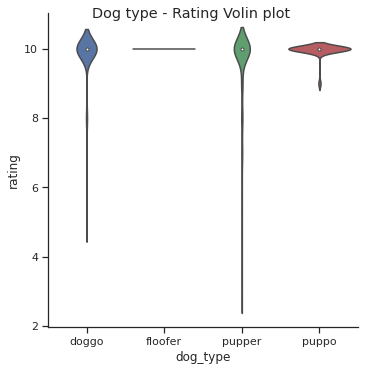

In [64]:
## Analysis
## 1. Dog type rating
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)


df_type_rating = df_cleaned[['dog_type','rating','favorites']].dropna()
g = sns.catplot(x="dog_type", y="rating", kind="violin", data=df_type_rating)
g.fig.suptitle("Dog type - Rating Volin plot")

dog_type
doggo       9.843373
floofer    10.000000
pupper      9.639004
puppo       9.965517
Name: rating, dtype: float64

<AxesSubplot:title={'center':'Dog type - Average rating'}, xlabel='dog_type', ylabel='Average rating'>

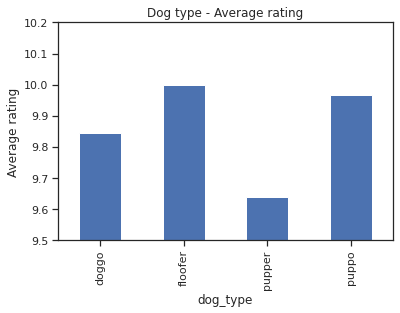

In [65]:
type_rating = df_type_rating.groupby('dog_type').mean()['rating']
display(type_rating)
type_rating.plot(kind='bar',ylim=(9.5,10.2), ylabel='Average rating', title='Dog type - Average rating')

dog_type
doggo      1143585
floofer      65663
pupper     1418806
puppo       492545
Name: favorites, dtype: int64

<AxesSubplot:title={'center':'Dog type - Total favorites'}, xlabel='dog_type', ylabel='Total favorites'>

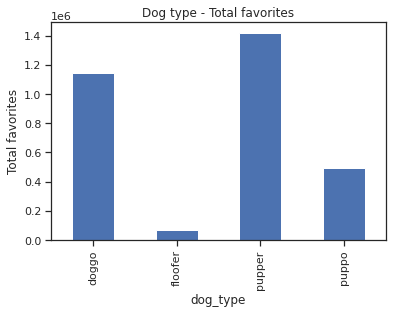

In [66]:
type_favor = df_type_rating.groupby('dog_type').sum()['favorites']
display(type_favor)
type_favor.plot(kind = 'bar',ylabel='Total favorites', title='Dog type - Total favorites')

In [67]:
# Very interesting results
# Floofer is the highest rating but least favorite
# Pupper is the lowest rating but most favorite

In [68]:
p1_type_rating = df_cleaned[['p1','rating','favorites']].dropna()
display(p1_type_rating)
p2_type_rating = df_cleaned[['p2','rating','favorites']].dropna()
display(p2_type_rating)
p3_type_rating = df_cleaned[['p3','rating','favorites']].dropna()
display(p3_type_rating)

,p1,rating,favorites
tweet_id,,,
666020888022790149,Welsh_springer_spaniel,8.0,2344
666029285002620928,redbone,7.0,117
666033412701032449,German_shepherd,9.0,107
666044226329800704,Rhodesian_ridgeback,6.0,259
666049248165822465,miniature_pinscher,5.0,93
...,...,...,...
890971913173991426,Appenzeller,10.0,10719
891087950875897856,Chesapeake_Bay_retriever,10.0,18429
891327558926688256,basset,10.0,36539


,p2,rating,favorites
tweet_id,,,
666020888022790149,collie,8.0,2344
666029285002620928,miniature_pinscher,7.0,117
666033412701032449,malinois,9.0,107
666044226329800704,redbone,6.0,259
666049248165822465,Rottweiler,5.0,93
...,...,...,...
891087950875897856,Irish_terrier,10.0,18429
891327558926688256,English_springer,10.0,36539
891689557279858688,Labrador_retriever,10.0,38258


,p3,rating,favorites
tweet_id,,,
666020888022790149,Shetland_sheepdog,8.0,2344
666029285002620928,Rhodesian_ridgeback,7.0,117
666033412701032449,bloodhound,9.0,107
666044226329800704,miniature_pinscher,6.0,259
666049248165822465,Doberman,5.0,93
...,...,...,...
890609185150312448,Chesapeake_Bay_retriever,10.0,25360
890729181411237888,Pembroke,10.0,58953
891327558926688256,German_short-haired_pointer,10.0,36539


In [69]:
df_breed_rating = pd.DataFrame(np.vstack([p1_type_rating.values,p2_type_rating.values,p3_type_rating.values]),
                               columns=['breed','rating','favorites'])
df_breed_rating['rating'] = df_breed_rating['rating'].astype(np.float)
df_breed_rating['favorites'] = df_breed_rating['favorites'].astype(np.int)

breed
Labrador_retriever                2941073
golden_retriever                  2625027
Pembroke                          1458006
Chihuahua                         1356411
Cardigan                          1201484
Pomeranian                        1032337
French_bulldog                     859591
cocker_spaniel                     772354
chow                               739570
Eskimo_dog                         729315
malamute                           713458
pug                                711242
Chesapeake_Bay_retriever           707834
Samoyed                            668415
toy_poodle                         638906
kuvasz                             606335
Staffordshire_bullterrier          591625
Siberian_husky                     589641
Great_Pyrenees                     568246
Pekinese                           567090
kelpie                             540921
Boston_bull                        517006
beagle                             490048
American_Staffordshire_terri

<AxesSubplot:title={'center':'Dog breed - Total favorites'}, xlabel='breed', ylabel='Total favorites'>

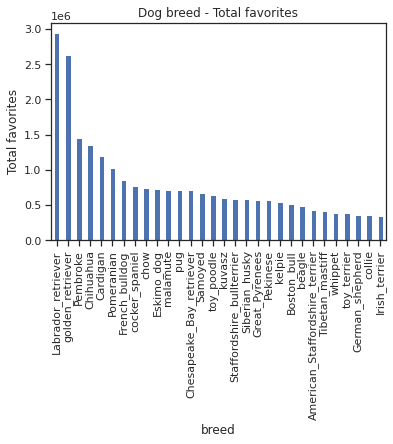

In [70]:
breed_favor = df_breed_rating.groupby('breed').sum()['favorites']
breed_favor_top30 = breed_favor.sort_values(ascending=False)[0:30]
display(breed_favor_top30)
breed_favor_top30.plot(kind = 'bar', ylabel='Total favorites', title='Dog breed - Total favorites')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4584 entries, 0 to 4583
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   breed      4584 non-null   object 
 1   rating     4584 non-null   float64
 2   favorites  4584 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 107.6+ KB


breed
Sussex_spaniel                    10.000000
Bouvier_des_Flandres              10.000000
Irish_wolfhound                   10.000000
Kerry_blue_terrier                10.000000
EntleBucher                       10.000000
Brabancon_griffon                  9.950000
basenji                            9.941176
Appenzeller                        9.937500
Bernese_mountain_dog               9.923077
Irish_setter                       9.920000
malamute                           9.913043
Tibetan_mastiff                    9.911765
Eskimo_dog                         9.903614
briard                             9.888889
golden_retriever                   9.886834
Samoyed                            9.885714
Blenheim_spaniel                   9.882353
German_shepherd                    9.877551
cocker_spaniel                     9.873684
chow                               9.864583
Irish_water_spaniel                9.857143
curly-coated_retriever             9.857143
Labrador_retriever        

<AxesSubplot:title={'center':'Dog breed - Average rating'}, xlabel='breed', ylabel='Average rating'>

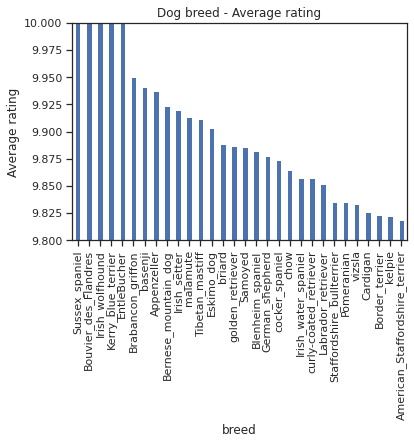

In [71]:
df_breed_rating.info()
breed_rating = df_breed_rating.groupby('breed').mean()['rating']
breed_rating_top30 = breed_rating.sort_values(ascending=False)[0:30]
display(breed_rating_top30)
breed_rating_top30.plot(kind = 'bar',ylim=(9.8,10), ylabel='Average rating', title='Dog breed - Average rating')

In [78]:
breed_rating_top30[0:10].to_markdown()

'| breed                |   rating |\n|:---------------------|---------:|\n| Sussex_spaniel       | 10       |\n| Bouvier_des_Flandres | 10       |\n| Irish_wolfhound      | 10       |\n| Kerry_blue_terrier   | 10       |\n| EntleBucher          | 10       |\n| Brabancon_griffon    |  9.95    |\n| basenji              |  9.94118 |\n| Appenzeller          |  9.9375  |\n| Bernese_mountain_dog |  9.92308 |\n| Irish_setter         |  9.92    |'

In [79]:
breed_favor_top30[0:10].to_markdown()

'| breed              |        favorites |\n|:-------------------|-----------------:|\n| Labrador_retriever |      2.94107e+06 |\n| golden_retriever   |      2.62503e+06 |\n| Pembroke           |      1.45801e+06 |\n| Chihuahua          |      1.35641e+06 |\n| Cardigan           |      1.20148e+06 |\n| Pomeranian         |      1.03234e+06 |\n| French_bulldog     | 859591           |\n| cocker_spaniel     | 772354           |\n| chow               | 739570           |\n| Eskimo_dog         | 729315           |'

In [72]:
set(breed_rating_top30[0:10].index)&set(breed_favor_top30[0:10].index)

set()

In [73]:
#top 10 rating breeds has no overlap with the top 10 favorite breeds